# Goals
Import the employee churn data set, analyse it, and then create several machine learning models to predict if an employee will leave the company or not, finally coming to a conclusion of which model is the best to use.

## Process 
I’ll be following a typical data science pipeline, “OSEMN”.

1. Obtaining the data is the first approach in solving the problem.

2. Scrubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.

3. Exploring the data will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix.

4. Modeling the data will give us our predictive power on whether an employee will leave.

5. INterpreting the data is last. With all the results and analysis of the data, what conclusion is made?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#define a custom palette
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
sns.set_palette(five_thirty_eight)
plt.style.use('fivethirtyeight')

## 1.0 Obtatining the data
The data that I am going to be working with here is a fake set of employee data that informs us if an employee has left the company or not. This dataset includes interesting features that helps us to create models for this classification problem, for example how satisfied an employee was, what salary they were on, what department they were in etc.

In [3]:
df = pd.DataFrame(pd.read_csv('HR_comma_sep.csv'))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2.0 Scrubbing the data
Having a dataset that is easy to work with is vital in creating an efficient workflow and model. I am going to rename some of the columns, move them around, and check for missing data.

In [4]:
#Renaming the columns to ones that I prefer

df.rename(index=str,columns={
    'sales' : 'position',
    'last_evaluation' : 'evaluation',
    'satisfaction_level' : 'satisfaction',
    'number_project' : 'projectCount',
    'average_montly_hours' : 'avgMonthlyHours',
    'time_spend_company': 'yearsCount',
    'Work_accident' : 'workAccident',
    'promotion_last_5years' : 'promotion',
                            },inplace=True)

#Moving the target column to the front of the dataframe

target = df['left']
df.drop('left',axis=1,inplace=True)
df.insert(0,'left',target)


df.head()

,left,satisfaction,evaluation,projectCount,avgMonthlyHours,yearsCount,workAccident,promotion,position,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


Now I will check to see if any of the features have missing data. This is a vital step as machine learning models cannot take in missing data. If all the columns return False, there is no missing data.

In [5]:
df.isnull().any()

left               False
satisfaction       False
evaluation         False
projectCount       False
avgMonthlyHours    False
yearsCount         False
workAccident       False
promotion          False
position           False
salary             False
dtype: bool

## 3.0 Exploring the data
I have prepared the data in a format that I am happy with and that I can work best with. Now I will undertake exploration of the data, this will help me to understand the dataset better to eventually decide on my approach when it comes to model selection.

In [6]:
# Checking the count of people who have the left the company (0: Stayed, 1: Left)

df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

## 3.1 Exploring employee satisfaction
I am interested in looking further into the satisfaction figures in the data. Let's delve deeper to see what we can find out.

Firs I will look at the distribution of satisfaction across the data set, then I will use KMeans clustering to discover if satisfied workers work longer hours.

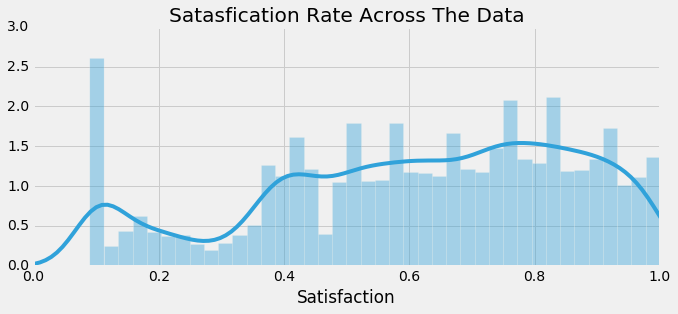

In [7]:
# Plotting the distibution of satisfaction rate

plt.figure(figsize=(10,4))
sns.distplot(df['satisfaction'],bins=40)
plt.title('Satasfication Rate Across The Data')
plt.xlim(0,1)
plt.xlabel('Satisfaction')

## 3.1.1 Do happy peope work more? Clustering the data
By clustering the satisfaction data I am able to further analyse the data

In [8]:
from sklearn.cluster import KMeans

(0.3, 1.08)

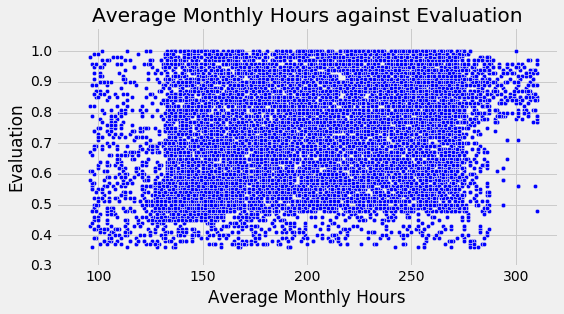

In [9]:
fig, ax1 = plt.subplots(figsize=(8,4))
plt.scatter(df['avgMonthlyHours'],df['evaluation'])
plt.title('Average Monthly Hours against Evaluation')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Evaluation')
plt.xlim(80,320)
plt.ylim(0.3,1.08)

I will now use KMeans to create three clusters of satisfaction in the dataset which I can then use to hue other data plots.

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df['satisfaction'].values.reshape(-1,1))
kmeans.cluster_centers_

array([[ 0.83300262],
       [ 0.51779836],
       [ 0.17043112]])

In [11]:
# Now I can use this data as a hue or c in future plots to analyse the happiness group

sat_cluster = kmeans.labels_

(0.3, 1.08)

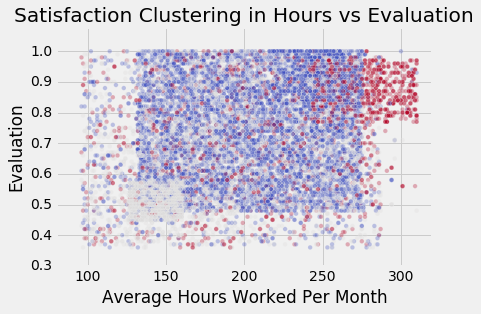

In [12]:
f, ax = plt.subplots()
ax.scatter(df['avgMonthlyHours'],df['evaluation'],c=sat_cluster,cmap='coolwarm',alpha=0.3)
plt.title('Satisfaction Clustering in Hours vs Evaluation')
plt.xlabel('Average Hours Worked Per Month')
plt.ylabel('Evaluation')
plt.xlim(80,320)
plt.ylim(0.3,1.08)

## 3.1 Conclusion
From our short exploration of the satisfaction data I have been able to discover that happy workers work longer hours.

The red data points are those that are the most satisfied, those that are grey are the least satisfied, and the blue are those in the middle. From this plot we can clearly see two clusters in the top right and bottom left. This shows that there is a tendency for satisfied workers to work long hours and receive a good evaluation, whilst the opposite being true for those who are less satisfied.

## 3.2 Exploration of pay

Now I will turn my attention to the salary feature. This is interesting as we have been provided with three levels of pay instead of a specific float for each employee. 

First I will explore the distribution of pay grade amongst the staff and then look at a breakdown per department.

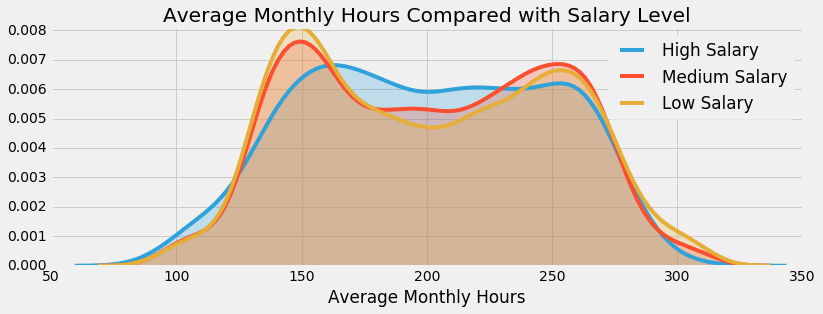

In [13]:
plt.figure(figsize=(12,4))
sns.kdeplot(df[df['salary'] == 'high']['avgMonthlyHours'],label='High Salary',shade=True)
sns.kdeplot(df[df['salary'] == 'medium']['avgMonthlyHours'],label='Medium Salary',shade=True)
sns.kdeplot(df[df['salary'] == 'low']['avgMonthlyHours'],label='Low Salary',shade=True)
plt.legend()
plt.title('Average Monthly Hours Compared with Salary Level')
plt.xlabel('Average Monthly Hours')


Are people in certain departments happier with their pay package?

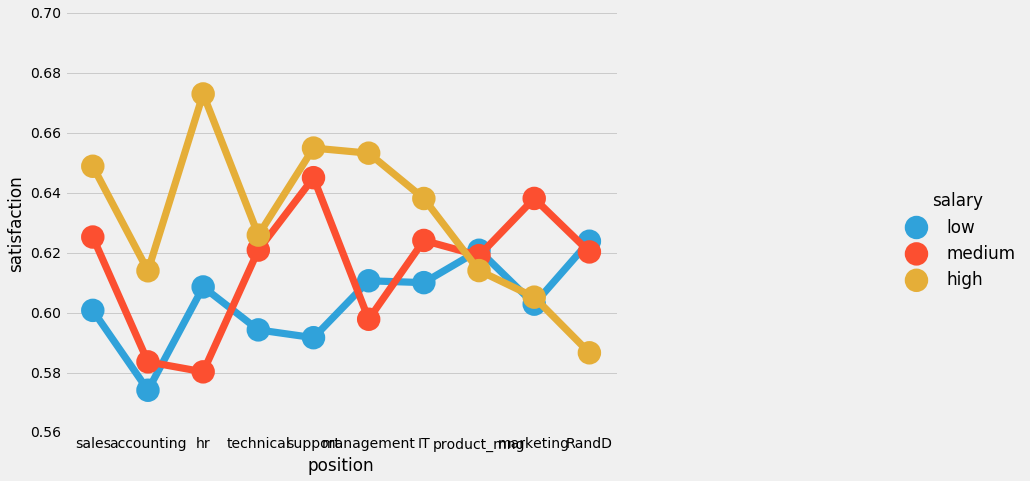

In [14]:
p = sns.factorplot(x='position',y='satisfaction',data=df,hue='salary',ci=None)
p.fig.set_size_inches(18,8)

From our exploration into the pay structure of the company that there are some interesting conclusions to make when it comes to satisfaction inequality in different departments. 

For example the HR department sees the largest disparity in satisfaction whilst the Sales and IT departments see steady increments in satisfaction as you move up in salary grade.

## 3.3 Who are the people who left? And who stayed?
As this project's primary aim is to predict who will stay and who will leave, I thought it fitting to explore the profile of those who left. My initial questions were "Did they leave because they were just unsatisfied", "Did it all come down to money?", and "Were they overworked?". Let's explore further.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

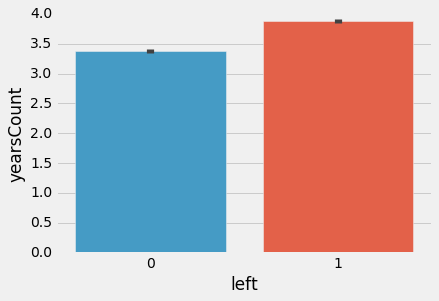

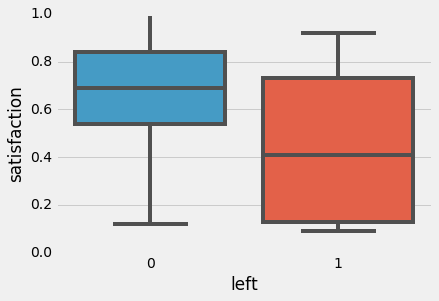

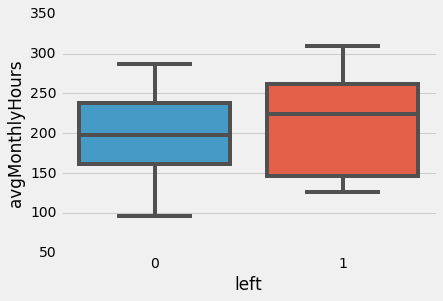

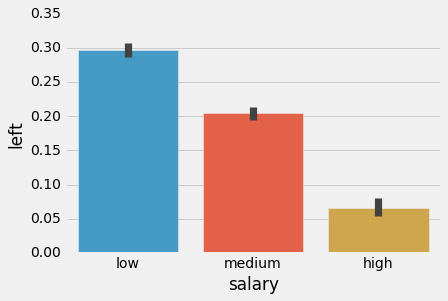

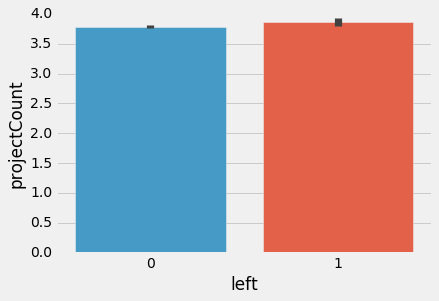

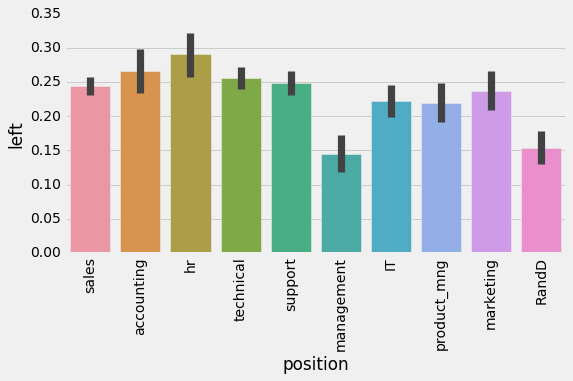

In [15]:
plt.figure()
sns.barplot(x='left',y='yearsCount',data=df)
plt.figure()
sns.boxplot(x='left',y='satisfaction',data=df)
plt.figure()
sns.boxplot(x='left',y='avgMonthlyHours',data=df)
plt.figure()
sns.barplot(x='salary',y='left',data=df)
plt.figure()
sns.barplot(x='left',y='projectCount',data=df)
plt.figure(figsize=(8,4))
sns.barplot(x='position',y='left',data=df)
plt.xticks(rotation='vertical')

### Conclustion of 3.3
From my initial exploration of the data here, I am inclined to say that the profile of those who left is:

1. Been at the company for around 4 years
2. Unsatisifed
3. Worked more hours than those who stayed
4. Was more likely to be in the lower pay bracket

My interpretation of this profile is someone who began at an entry role, worked over the amount prescribed in the hope of progressing through the company. They however were not able to progress through the pay scale, for what could be multiple reasons, this made them less and less satisfied which then meant they left the company.

Let's see if this is accurate when we later look at feature importance in the machine learning model.

# 4.0 Modelling the data
Now that I have been able to grow my understanding of the data, I will apply machine learning to create an accurate model for predicting if someone will leave the company or not. I will be using three models here to test their accuracy.
1. Decision Tree Classifier
2. Random Forest Classifier
3. Logistic Regresson

In [16]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

### Categorical Features 
To increase the accuracy of my machine learning models I will be converting the position and salary features into categorical features.

In [17]:
dummies = pd.get_dummies(df[['position','salary']])
df.drop(['position','salary'],inplace=True,axis=1)
df = pd.concat([df,dummies])

# These new categorical features will use NaN where there is no value, however I need 0.0 instead of this

df.fillna(0,inplace=True)

In [18]:
# How the data looks now after adding categorical features

df.head()

,avgMonthlyHours,evaluation,left,position_IT,position_RandD,position_accounting,position_hr,position_management,position_marketing,position_product_mng,...,position_support,position_technical,projectCount,promotion,salary_high,salary_low,salary_medium,satisfaction,workAccident,yearsCount
0,157.0,0.53,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.38,0.0,3.0
1,262.0,0.86,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.80,0.0,6.0
2,272.0,0.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.11,0.0,4.0
3,223.0,0.87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.72,0.0,5.0
4,159.0,0.52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.37,0.0,3.0


### Train, test split
Now I will split my data into training and testing data. It is crucial to the integrity of the machine learning model that one doesn't test the model on the data you have trained it on.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('left',axis=1),df['left'],test_size=0.33)

## 4.1 Applying the models
## 4.1.1 Decision Tree Classifier
My first model of choice is the Decision Tree Classifier.

In [20]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions_dt = dt.predict(x_test)

error_dt = abs(predictions_dt - y_test)

In [21]:
print(confusion_matrix(y_test, predictions_dt))
print('\n')
print(classification_report(y_test,predictions_dt))
print('\n')
dt_acc = np.mean(predictions_dt == y_test)
print("Accuracy: {:.4%}".format(dt_acc))
print('Average absolute error:', round(np.mean(error_dt), 5), 'degrees.')

[[8645   86]
 [  26 1143]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99      8731
        1.0       0.93      0.98      0.95      1169

avg / total       0.99      0.99      0.99      9900



Accuracy: 98.8687%
Average absolute error: 0.01131 degrees.


## 4.1.2 Random Forest Classifier
Now to apply a Random Forest Classifier.

In [22]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions_rf = rf.predict(x_test)

error_rf = abs(predictions_rf - y_test)

In [23]:
print(confusion_matrix(y_test, predictions_rf))
print('\n')
print(classification_report(y_test,predictions_rf))
print('\n')
rf_acc = np.mean(predictions_rf == y_test)
print("Accuracy: {:.4%}".format(rf_acc))
print('\n')
print('Average absolute error:', round(np.mean(error_rf), 5), 'degrees.')

[[8720   11]
 [  36 1133]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      8731
        1.0       0.99      0.97      0.98      1169

avg / total       1.00      1.00      1.00      9900



Accuracy: 99.5253%


Average absolute error: 0.00475 degrees.


## 4.1.3 Logistic regression
Finally I will look at a logistic regression.

In [24]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions_lr = lr.predict(x_test)

error_lr = abs(predictions_lr - y_test)

In [25]:
print(confusion_matrix(y_test, predictions_lr))
print('\n')
print(classification_report(y_test,predictions_lr))
print('\n')
lr_acc = np.mean(predictions_lr == y_test)
print("Accuracy: {:.4%}".format(lr_acc))
print('\n')
print('Average absolute error:', round(np.mean(error_lr), 5), 'degrees.')

[[8463  268]
 [ 879  290]]


             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94      8731
        1.0       0.52      0.25      0.34      1169

avg / total       0.86      0.88      0.87      9900



Accuracy: 88.4141%


Average absolute error: 0.11586 degrees.


Average absolute error: 0.11545 degrees.


Now let us plot the error for those 3 models to see which was the most most accurate.

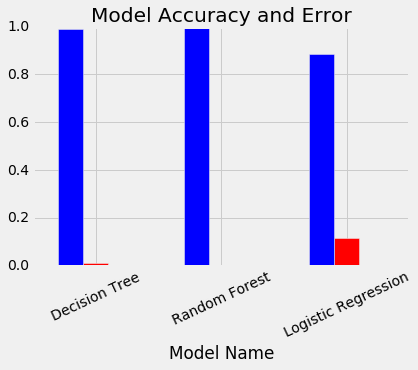

In [37]:
acc = {'Decision Tree': dt_acc, 'Random Forest': rf_acc, 'Logistic Regression':lr_acc}
errors = {'Decision Tree': round(np.mean(error_dt), 10), 'Random Forest': round(np.mean(error_rf), 10), 'Logistic Regression': round(np.mean(error_lr), 10)}

X = np.arange(len(acc))
ax = plt.subplot(111)
ax.bar(X, errors.values(),color='red', width = 0.2,align='center')
ax.bar(X - 0.2, acc.values(),color='blue', width = 0.2,align='center')
#ax.legend(('Error','Accuracy'))
plt.xticks(X, errors.keys(), rotation=25)
plt.title('Model Accuracy and Error')
plt.ylabel('')
plt.xlabel('Model Name')
plt.show()

## 5.0 Interpretting the data
I have created three models here, each with a different level of accuracy. But it would appear that the model with the highest accuracy and the lowest error was the Random Forest Model. Let's now look at the feature importance in that model to determine which feature had the largest impact on my Random Forest Model.

In [29]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df.drop('left',axis=1).columns, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: satisfaction         Importance: 0.26
Variable: yearsCount           Importance: 0.25
Variable: projectCount         Importance: 0.18
Variable: evaluation           Importance: 0.16
Variable: avgMonthlyHours      Importance: 0.13
Variable: salary_low           Importance: 0.01
Variable: workAccident         Importance: 0.01
Variable: position_IT          Importance: 0.0
Variable: position_RandD       Importance: 0.0
Variable: position_accounting  Importance: 0.0
Variable: position_hr          Importance: 0.0
Variable: position_management  Importance: 0.0
Variable: position_marketing   Importance: 0.0
Variable: position_product_mng Importance: 0.0
Variable: position_sales       Importance: 0.0
Variable: position_support     Importance: 0.0
Variable: position_technical   Importance: 0.0
Variable: promotion            Importance: 0.0
Variable: salary_high          Importance: 0.0
Variable: salary_medium        Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

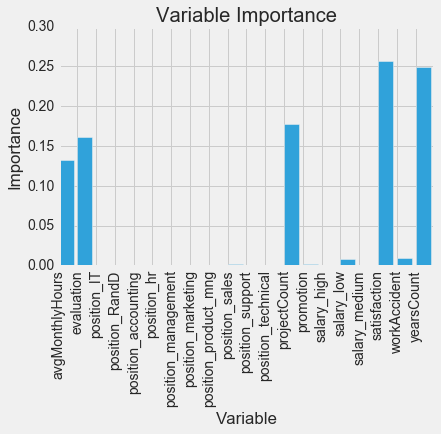

In [30]:
x_values = list(range(len(importances)))
plt.bar(x_values,importances,orientation='vertical')
plt.xticks(x_values,df.drop('left',axis=1).columns,rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importance')

## 5.1 Real world applications
This data exploration and machine learning process has been interesting, however are there any applications that this could bring away from the numbers? Well, yes there are indeed. Let me run through a few:

1. Feature Importance
I discovered that Satisfaction, Number of Years, and Average Monthly Hours were the three largest contributors to my machine learning model. This insight could be used to make sure that these 3 factors are monitored closely to improve employee retention.

2. Simple Linear Regression Model
Further investigation into the Linear Regression Model would help one to create a simple Linear Regression equation containing just 2 or 3 of the key variables. This equation could help a HR department quickly asses the likelyhood of an employee leaving, without the need of a machine learning model, by applying it to some form of percentage scale.

3. Integration with In-House System
The full machine learning model could be integrated into the in-house HR system to flag up if an employee is in danger of leaving, according to the model. This could help HR teams address the issues before it is too late.

4. Satisfaction Inequality
There appears to be a large disparity in satisfaction in certain departmets. This could be monitored and changed for the better.